In [1]:
from datascience import *
import numpy as np
from path_data_variable import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'path_data_variable'

# Visualizing Numerical Distributions

Many of the variables that data scientists study are *quantitative* or *numerical*. Their values are numbers on which you can perform arithmetic. Examples that we have seen include the number of periods in chapters of a book, the amount of money made by movies, and the age of people in the United States.

The values of a categorical variable can be given numerical codes, but that doesn't make the variable quantitative. In the example in which we studied Census data broken down by age group, the categorial variable `SEX` had the numerical codes `1` for 'Male,' `2` for 'Female,' and `0` for the aggregate of both groups `1` and `2`. While 0, 1, and 2 are numbers, in this context it doesn't make sense to subtract 1 from 2, or take the average of 0, 1, and 2, or perform other arithmetic on the three values. `SEX` is a categorical variable even though the values have been given a numerical code.

For our main example, we will return to a dataset that we studied when we were visualizing categorical data. It is the table `top`, which consists of data from U.S.A.'s top grossing movies of all time (as of 2017). For convenience, here is the description of the table again.

The first column contains the title of the movie. The second column contains the name of the studio that produced the movie. The third contains the domestic box office gross in dollars, and the fourth contains the  gross amount that would have been earned from ticket sales at 2016 prices. The fifth contains the release year of the movie. 

There are 200 movies on the list. Here are the top ten according to the unadjusted gross receipts in the column `Gross`.

In [ ]:
top = Table.read_table(path_data + 'top_movies_2017.csv')
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
Star Wars,Fox,"460,998,007","1,583,483,200",1977
The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
Titanic,Paramount,"658,672,302","1,204,368,000",1997
The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
Jaws,Universal,"260,000,000","1,138,620,700",1975
Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In this section we will draw graphs of the distribution of the numerical variable in the column `Gross (Adjusted)`. For simplicity, let's create a smaller table that has the information that we need. And since three-digit numbers are easier to work with than nine-digit numbers, let's measure the `Adjusted Gross` receipts in millions of dollars. Note how `np.round` is used to retain only two decimal places in each entry of the column.

In [ ]:
millions = top.select(0).with_columns('Adjusted Gross', 
                                     np.round(top.column(3)/1e6, 2))
millions

Title,Adjusted Gross
Gone with the Wind,1796.18
Star Wars,1583.48
The Sound of Music,1266.07
E.T.: The Extra-Terrestrial,1261.08
Titanic,1204.37
The Ten Commandments,1164.59
Jaws,1138.62
Doctor Zhivago,1103.56
The Exorcist,983.23
Snow White and the Seven Dwarves,969.01


## Binning the Data ##
Look at the values of the quantitative variable `Adjusted Gross`. There is likely to be only one movie at each individual value, since the values are being measured rather finely. It is more interesting to group the values into intervals, known as *bins*, and see how many movies are in each bin. This process is called *binning*.

The counts of individuals (that is, rows) in the bins can be computed using the `bin` method, analogous to the `group` method used in the case of categorical data. The `bin` method takes as its argument a column label or index, and an optional argument in which you can specify the bins that you want. 

The result is a two-column table that contains the number of rows in each bin. The first column lists the left endpoints of the bins (but see the note about the last bin, below). 

Let's try out the method and examine the details of the output. To choose some bins, we will start by looking at the smallest and largest values of `Adjusted Gross`.

In [ ]:
adj_gross = millions.column('Adjusted Gross')
min(adj_gross), max(adj_gross)

(338.41000000000003, 1796.1800000000001)

Let's try bins of width 100, starting at 300 and going to 2000. You are welcome to make other choices. It is common to start with something that seems reasonable and then adjust based on the results.

In [ ]:
# Bin is group but stepwise numerical "groups" 

# bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))



# def find_step(x):
#     power_of_ten = 10
#     while True:
#         if power_of_ten < x:
#             power_of_ten * 10
#         elif power_of_ten > x:
#             power_of_ten / 10
#             break 
# print(find_step(min(adj_gross))) 

def nearest_power_of_10(number):
    import math 
    if number == 0:
        return 0
    exponent = round(math.log10(abs(number)))
    return 10 ** exponent

print(f"12 {nearest_power_of_10(12)}")
print(f"99 {nearest_power_of_10(99)}")

def find_step(number):
    pow_10 = nearest_power_of_10(number)
    if(( pow_10 / 2) < number):
        try: 
            return pow_10 / 10
        except:
            pass 
    return pow_10 

print(f"12 {find_step(12)}")
print(f"99 {find_step(99)}")



lower_bound = min(adj_gross)
lower_bound = 100 * round(lower_bound/100)

lower_bound =  100 * round(min(adj_gross)/100)





upper_bound = max(adj_gross)

upper_bound = 100 * round(upper_bound/100) + 100
upper_bound = 100 * round(max(adj_gross)/100) + 100

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

12 10
99 100
12 1.0
99 10.0
Lower Bound: 300, Upper Bound: 1900


# Generic Bins Function

In [ ]:
def generic_bins(table, target_col):
    def find_step(number):
        """Instead of find_step(), you can also use bins=5 or something in bins(default_argument: bins = number)"""
        def nearest_power_of_10(number):
            import math 
            if number == 0:
                return 0
            exponent = round(math.log10(abs(number)))
            return 10 ** exponent
        pow_10 = nearest_power_of_10(number)
        if(( pow_10 / 2) < number):
            try: 
                return pow_10 / 10
            except:
                pass 
        return pow_10 
    step = find_step(max(table.column(target_col)))
    lower_bound =  step * round(min(table.column(target_col))/step)
    upper_bound =  step * round(max(table.column(target_col))/step)
    
    print(f"step {step}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    
    generic_bin_counts = table.bin(target_col, bins=np.arange(lower_bound, upper_bound, step))
    return generic_bin_counts
    # generic_bin_counts = table.bin(target_col, bins=np.arange())
milllions_bins_generic = generic_bins(millions, "Adjusted Gross")
milllions_bins_generic.show(5)
milllions_bins_generic.sort( milllions_bins_generic.labels[0], descending=True ).show(5)

step 100.0
Lower Bound: 300.0, Upper Bound: 1800.0


bin,Adjusted Gross count
300,68
400,60
500,32
600,15
700,7


bin,Adjusted Gross count
1700,0
1600,0
1500,1
1400,0
1300,0


bin,Adjusted Gross count
300,68
400,60
500,32
600,15
700,7


0


bin,Adjusted Gross count
2000,0
1900,0
1800,0
1700,1
1600,0


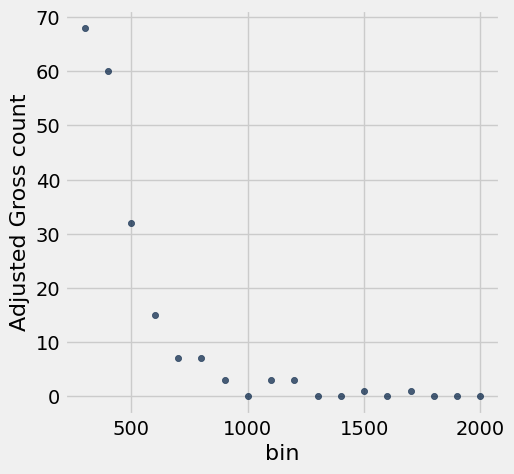

In [ ]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))
bin_counts.show(5)
print(bin_counts.last("Adjusted Gross count"))
bin_counts.sort("bin", descending=True).show(5)
bin_counts.scatter("bin", "Adjusted Gross count")

Let's examine Column 0, the `bin` column. This column specifies the left end of each bin, except in the last row as explained below. 

Since the bins split the number line into intervals, they are contiguous. So we must be careful about values at the endpoints. By the usual Python convention, each bin except the last includes its left endpoint but not its right endpoint.

To make this point, we will use the notation [*a, b*) to refer to the bin that contains all the values that are greater than or equal to *a* and strictly less than *b*.

To understand the first row of the table, you have to look at the second row as well. These two rows tell us that there were 68 movies in the bin [300, 400). That is, 68 movies had adjusted gross receipts of at least 300 million dollars but less than 400 million dollars.

In general, each element in the `Adjusted Gross count` column counts all the `Adjusted Gross` values that are greater than or equal to the value in `bin`, but less than the next value in `bin`.

**The last bin:** Notice the `bin` value 2000 in the last row. That's not the left endpoint of any bin. Instead, it's the right endpoint of the last bin. This bin is different from all the others in that it has the form [a, b]. It includes the data at *both* endpoints. In our example it doesn't matter because no movie made 2 billion dollars (that is, 2000 million). But this aspect of binning is important to keep in mind in case you want the bins to end exactly at the maximum value of the data. All the counts for this last bin appear in the second-to-last row, and the count for the last row is always zero. 

There are other ways to use the `bin` method. If you don't specify any bins, the default is to produce 10 equally wide bins between the minimum and maximum values of the data. This is often useful for getting a quick sense of the distribution, but the endpoints of the bins tend to be alarming.

In [ ]:
millions.bin('Adjusted Gross').show()

bin,Adjusted Gross count
338.41,115
484.187,50
629.964,14
775.741,10
921.518,3
1067.3,4
1213.07,2
1358.85,0
1504.63,1
1650.4,1


You can specify a number of equally wide bins. For example, the option `bins=4` leads to 4 equally spaced bins.

In [ ]:
millions.bin('Adjusted Gross', bins=4)

bin,Adjusted Gross count
338.41,177
702.852,15
1067.3,6
1431.74,2
1796.18,0


But with quantitative data, the bins don't have to be equally wide. We will see an example of unequal bins later.

## Histogram
A *histogram* is a visualization of the distribution of a quantitative variable. It looks very much like a bar chart but there are some important differences that we will examine in this section. First, let's just draw a histogram of the adjusted receipts.

The `hist` method generates a histogram of the values in a column. The optional `unit` argument is used in the labels on the two axes. The histogram below shows the distribution of the adjusted gross amounts, in millions of 2016 dollars. We have not specified the bins, so `hist` creates 10 equally wide bins between the minimum and maximum values of the data.

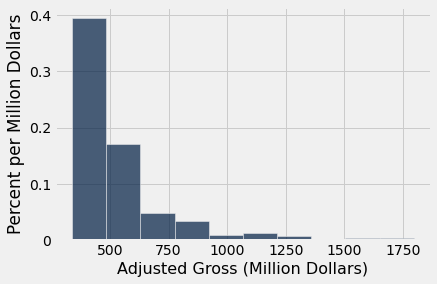

In [ ]:
millions.hist('Adjusted Gross', unit="Million Dollars")

This figure has two numerical axes. We will take a quick look at the horizontal axis first, and then examine the vertical axis carefully. For now, just note that **the vertical axis does not represent percents**.

## The Horizontal Axis

Although in this dataset no movie grossed an amount that is exactly on the edge between two bins, `hist` does have to account for situations where there might have been values at the edges. So `hist` uses the same *endpoint convention* as the `bin` method. Bins include the data at their left endpoint, but not the data at their right endpoint, except for the rightmost bin which includes both endpoints. 

We can see that there are 10 bins (some bars are so low that they are hard to see), and that they all have the same width. We can also see that none of the movies grossed fewer than 300 million dollars; that is because we are considering only the top grossing movies. 

It is a little harder to see exactly where the ends of the bins are situated. So it is hard to judge exactly where one bar ends and the next begins.

The optional argument `bins` can be used with `hist` to specify the endpoints of the bins exactly as with the `bin` method. We will start by setting the numbers in `bins` to be 300, 400, 500, and so on, ending with 2000.  

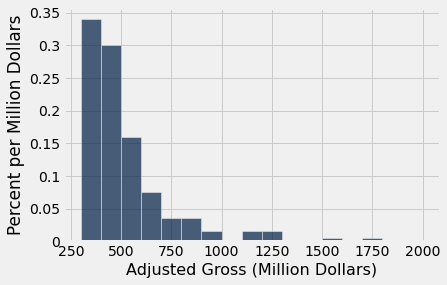

In [ ]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")

The horizontal axis of this figure is easier to read. For example, you can see exactly where 600 is, even though it is not labeled.

A very small number of movies grossed a billion dollars (1000 million) or more. This results in the figure being *skewed to the right*, or, less formally, having *a long right hand tail*. Distributions of variables like income or rent in large populations also often have this kind of shape.

## The Area Principle ##
Both axes of a histogram are numerical, so you can do arithmetic on both of them. For example, you can multiply the values on either or both of the axes by a factor. To see how this could affect visual perception, let's step back from histograms and look at a graphic provided for this purpose by the site [Flowing Data](https://flowingdata.com/2012/03/16/new-ipad-battery-size-is-huge/). It is a comparison between the battery sizes of two iPad models.

![iPad batteries](../../../images/ipad_battery.png)

The larger of the batteries is supposed to be 70% bigger than the smaller. So it's meant to be bigger but not quite twice as big. However, the larger battery in the picture looks almost four times the size of the smaller one.

The reason for this problem is that the eye picks up *area* as the measure of size, not just height or just width. In the picture, both dimensions have been increased by 70%, leading to a multiplicative effect in the area.

The area principle of visualization says that when we represent a magnitude by a figure that has two dimensions, such as a rectangle, then the *area* of the figure should represent the magnitude.

In [ ]:
file_path_image = "../../../images/ipad_battery.png"
import os
print(f"Is File Path? {os.path.isfile(file_path_image)}")

# file_path_image = file_path_image.splitext("../")
file_path_image = file_path_image.split("../", maxsplit=1)[1]
print(file_path_image)
print(f"Is File Path? {os.path.isfile(file_path_image)}")

file_path_image = file_path_image.split("../", maxsplit=1)[1]
print(file_path_image)
print(f"Is File Path? {os.path.isfile(file_path_image)}")



Is File Path? False
../../images/ipad_battery.png
Is File Path? False
../images/ipad_battery.png
Is File Path? True


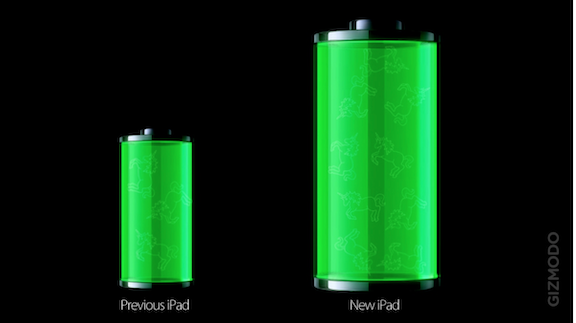

In [ ]:
from IPython.display import Image

# Path to the image
img_path = file_path_image

# Display the image
display(Image(filename=img_path, width = 300, height = 300))

## The Histogram: General Principles and Calculation - \text instead of \text

Histograms follow the area principle and have two defining properties:

1. The bins are drawn to scale and are contiguous (though some might be empty), because the values on the horizontal axis are numerical and therefore have fixed positions on the number line.
2. The **area** of each bar is proportional to the number of entries in the bin. 

Property 2 is the key to drawing a histogram, and is usually achieved as follows:

$$
\text{area of bar} ~=~ \text{percent of entries in bin}
$$

Since areas represent percents, heights represent something other than percents. The numerical calculation of the heights just uses the fact that the bar is a rectangle:

$$
\text{area of bar} = \text{height of bar} \times \text{width of bin}
$$

and so

$$
\text{height of bar} ~=~ 
\frac{\text{area of bar}}{\text{width of bin}} ~=~
\frac{\text{percent of entries in bin}}{\text{width of bin}}
$$

The units of height are "percent per unit on the horizontal axis." The height is the percent in the bin relative to the width of the bin. So it is called *density* or *crowdedness*.

When drawn using this method, the histogram is said to be drawn on the *density scale*. On this scale:
- The area of each bar is equal to the percent of data values that are in the corresponding bin.
- The total area of all the bars in the histogram is 100%. In terms of proportions, we can say that the areas of all the bars in a histogram "sum to 1".

## The Vertical Axis: Density Scale

As we have just seen, the height of each bar is the percent of elements that fall into the corresponding bin, relative to the width of the bin. We will now see how `hist` calculated the heights of all the bars of the histogram above. 

Here is the histogram again for ease of reference. 

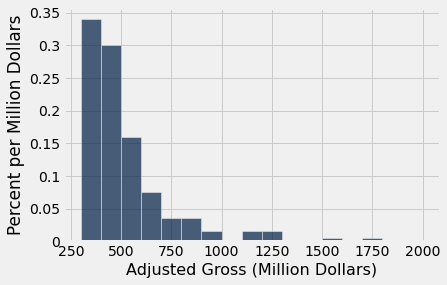

In [ ]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")

Recall that the table `bin_counts` has the counts in all the bins of the histogram, specified by `bins=np.arange(300, 2000, 100)`. Also remember that there are 200 movies in all.

In [ ]:
bin_counts.show(3)

bin,Adjusted Gross count
300,68
400,60
500,32


The [300, 400) bin contains 68 movies. That's 34% of all the movies:

$$
\text{Percent} = \frac{68}{200} \cdot 100 = 34
$$

The width of the [300, 400) bin is $400 - 300 = 100$. So

$$
\text{Height} = \frac{34}{100} = 0.34
$$

**Units:** The height of the bar is 34% divided by 100 million dollars, and so the height is 0.34% per million dollars. 

The height of bar is **not** the percent of entries in the bin. It is the percent of entries in the bin relative to the amount of space in the bin. That is why the height measures crowdedness or density. The vertical axis is said to be on the density scale. 

## Why Not Simply Plot the Counts?

The main reason for plotting density on the vertical axis instead of counts or percents is to be able to compare histograms and approximate them with smooth curves where proportions are represented by areas under the curve.

For example, later in the course you will see histograms that are approximately bell-shaped. The figure below shows such a shape. The gold shaded area happens to be 95% of the total area under the curve. Notice that this is quite believeable based on the areas you see in the figure, even though there are no numbers on the axes. That is why we draw histograms so that areas represent percents.

![shaded bell-shaped curve](../../../images/normal_shaded.png)

Drawing histograms on the density scale also allows us to compare histograms that are based on data sets of different sizes or have different choices of bins. In such cases, neither bin counts nor percents may be directly comparable. But if both histograms are drawn to the density scale then areas and densities are comparable.

If a histogram has unequal bins, then plotting on the density scale is a requirement for interpretability. For some variables, unequal bins may be natural. For example, in the U.S. education system, elementary school consists of Grades 1-5, middle school is Grades 6-8, high school is Grades 9-12, and a Bachelor's degree takes a further four years. Data on years of education might be binned using these intervals. In fact, no matter what the variable, bins don't have to be equal. It is quite common to have one very wide bin towards the left end or right end of the data, where there are not many values.

Let's plot a histogram of adjusted gross receipts using unequal bins, and then see what happens if we plot counts instead.

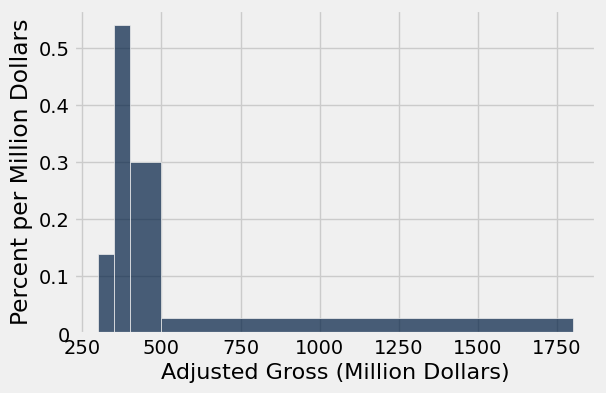

In [ ]:
uneven = make_array(300, 350, 400, 500, 1800)
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

Notice that the [400, 500) bar has the same height (0.3% per million dollars) as in the histograms above. 

The areas of the other bars represent the percents in the bins, as usual. The `bin` method allows us to see the counts in each bin.

In [ ]:
millions.bin('Adjusted Gross', bins=uneven)

bin,Adjusted Gross count
300,14
350,54
400,60
500,72
1800,0


The [300, 350) bin has only 14 movies whereas the [500, 1800] bin has 72 movies. But the bar over the [500, 1800] bin is much shorter than the bar over [300, 350). The [500, 1800] bin is so wide that its 72 movies are much less crowded than the 14 movies in the narrow [300, 350) bin. In other words, there is less density over the [500, 1800] interval.

If instead you just plot the counts using the `normed=False` option as shown below, the figure looks completely different and misrepresents the data.

# My brain has not processed this yet

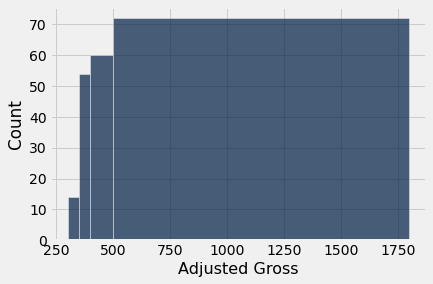

In [ ]:
millions.hist('Adjusted Gross', bins=uneven, normed=False)

Even though `hist` has been used, **the figure above is NOT A HISTOGRAM.** It misleadingly exaggerates the movies grossing at least 500 million dollars. The height of each bar is simply plotted at the number of movies in the bin, without accounting for the difference in the widths of the bins. In this count-based figure, the shape of the distribution of movies is lost entirely.

## Flat Tops and the Level of Detail

Even though the density scale correctly represents percents using area, some detail is lost by grouping values into bins.

Take another look at the [400, 500) bin in the figure below. The flat top of the bar, at the level 0.3% per million dollars, hides the fact that the movies are somewhat unevenly distributed across that bin. 

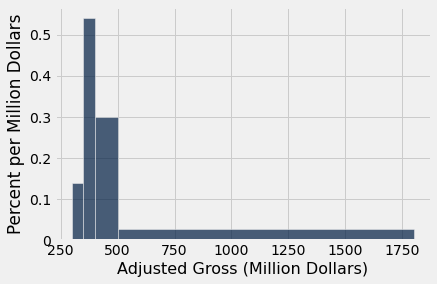

In [ ]:
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

To see this, let us split the [400, 500) bin into 10 narrower bins, each of width 10 million dollars.

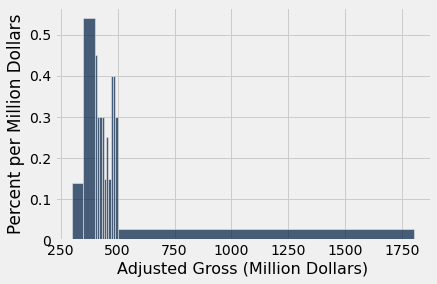

In [ ]:
some_tiny_bins = make_array(
    300, 350, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 1800)
millions.hist('Adjusted Gross', bins=some_tiny_bins, unit='Million Dollars')

Some of the skinny bars are taller than 0.3 and others are shorter. By putting a flat top at the level 0.3 across the whole bin, we are deciding to ignore the finer detail and are using the flat level as a rough approximation. Often, though not always, this is sufficient for understanding the general shape of the distribution.

**The height as a rough approximation.**
This observation gives us a different way of thinking about the height.
Look again at the [400, 500) bin in the earlier histograms. As we have seen, the bin is 100 million dollars wide and contains 30% of the data. Therefore the height of the corresponding bar is 0.3% per million dollars.

Now think of the bin as consisting of 100 narrow bins that are each 1 million dollars wide. The bar's height of "0.3% per million dollars" means that as a rough approximation, 0.3% of the movies are in each of those 100 skinny bins of width 1 million dollars.

We have the entire dataset that is being used to draw the histograms. So we can draw the histograms to as fine a level of detail as the data and our patience will allow. Smaller bins will lead to a more detailed picture. However, if you are looking at a histogram in a book or on a website, and you don't have access to the underlying dataset, then it becomes important to have a clear understanding of the "rough approximation" created by the flat tops.

## Computing All Heights ##
We know how to find the height of each histogram bar. Let's use that to develop code that computes all the heights at once. 

We will use the histogram below as our example. The bins are specified in the array `uneven`.

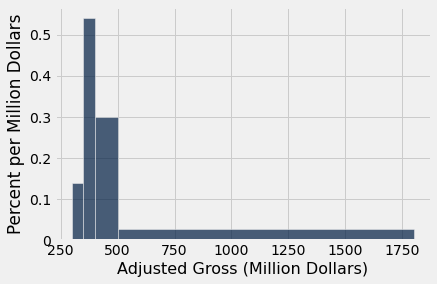

In [ ]:
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

We will start by getting the counts in the bins.

In [ ]:
histogram_elements = millions.bin('Adjusted Gross', bins=uneven).relabeled(1, 'count')
histogram_elements

bin,count
300,14
350,54
400,60
500,72
1800,0


We can now add a column containing the percent in each bin.

In [ ]:
total_count = sum(histogram_elements.column('count'))
percents = np.round(100*histogram_elements.column('count')/total_count, 2)
histogram_elements = histogram_elements.with_columns('percent', percents)
histogram_elements

bin,count,percent
300,14,7
350,54,27
400,60,30
500,72,36
1800,0,0


Column 0 contains the left ends of all the bins, except for its last element which is the right end of the last bin. So we can use `np.diff` to find the widths of all the bins. Then we will add the widths to the `histogram_elements` table, by first removing the last row.

In [ ]:
bin_widths = np.diff(histogram_elements.column('bin'))
num_bins = histogram_elements.num_rows - 1    # the number of bins
histogram_elements = histogram_elements.take(
    np.arange(num_bins)).with_columns(
    'width', bin_widths
)
histogram_elements

bin,count,percent,width
300,14,7,50
350,54,27,50
400,60,30,100
500,72,36,1300


Finally, we can add a column of heights.

In [ ]:
heights = np.round(
    histogram_elements.column('percent')/histogram_elements.column('width'),2)
histogram_elements = histogram_elements.with_columns('height', heights)
histogram_elements

bin,count,percent,width,height
300,14,7,50,0.14
350,54,27,50,0.54
400,60,30,100,0.3
500,72,36,1300,0.03


Here is the histogram again for convenience. Compare it with the table above to confirm that the calculation of heights looks good.

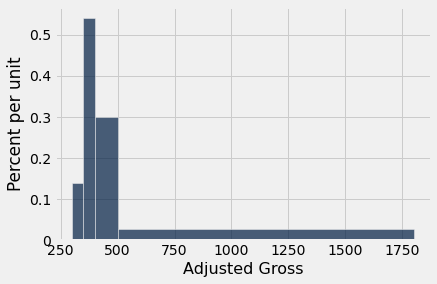

In [ ]:
millions.hist('Adjusted Gross', bins=uneven)

## Differences Between Bar Charts and Histograms 

- Bar charts display one numerical quantity per category. They are often used to display the distributions of categorical variables. Histograms display the distributions of quantitative variables. 
- All the bars in a bar chart have the same width, and there is an equal amount of space between consecutive bars. The bars can be in any order because the distribution is categorical. The bars of a histogram are contiguous; the bins are drawn to scale on the number line.
- The lengths (or heights, if the bars are drawn vertically) of the bars in a bar chart are proportional to the count in each category. The heights of bars in a histogram measure densities; the *areas* of bars in a histogram are proportional to the counts in the bins.